<a href="https://colab.research.google.com/github/Joelss23/Proyectos-y-Actividades/blob/main/Reto_Actividad_2_Paradigma_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar Librerias

In [ ]:
#Librerias necesarias para acceder a drive
import os
from google.colab import drive

#Montar drive
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')

#Ruta a la carpeta de drive
path = "/content/drive/My Drive/Paradigma BD"
os.chdir(path)

#Verificar el cambio el directorio
print("Directorio actual:", os.getcwd())

#Listar archivos
!ls -lh

Directorio actual: /content/drive/My Drive/Paradigma BD
total 13M
-rw------- 1 root root 1.3M Feb 13 21:27 bank-full-aplicacion.csv
-rw------- 1 root root  12M Feb 13 21:27 bank-full-entrenamiento.csv
-rw------- 1 root root  22K Feb 13 21:27 bank-sem-aplicacion.csv
-rw------- 1 root root 191K Feb 13 21:27 bank-sem-entrenamiento.csv
-rw------- 1 root root  21K Feb 23 06:19 clientes_susceptibles.csv


In [ ]:
# Librerias necesarias para Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

##Cargar Datos

In [ ]:
#Cargar datos
train_data = pd.read_csv("bank-full-entrenamiento.csv")
application_data = pd.read_csv("bank-full-aplicacion.csv")

##Exploracion de Datos

In [ ]:
#Exploracion de los datos
print("Previa datos de entrenamiento:")
print(train_data.head())

Previa datos de entrenamiento:
  cod_cliente  edad_cliente  margen_beneficio  sdo_financiacion  \
0     Client0            61             95.91          79963.58   
1     Client1            39             44.83          36715.06   
2     Client2            61            -11.46          28453.37   
3     Client3            54              4.24              0.00   
4     Client4            39             93.14         118676.91   

   sdo_inversion  sdo_inversion_fuera_bal  sdo_inversion_no_T1  \
0        2228.51                     0.00              2228.51   
1           0.00                    27.12                 0.00   
2        2781.85                     0.00              2781.85   
3        1048.20                     0.00              1048.20   
4       13424.08                 33215.23             13424.08   

   sdo_financiacion_no_T1  imp_domiciliaciones_cargo  imp_cuota_pres_hip  ...  \
0                79963.58                     236.63              521.61  ...   
1      

In [ ]:
print("Informacion de los datos:")
print(train_data.info())

Informacion de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68892 entries, 0 to 68891
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cod_cliente                68892 non-null  object 
 1   edad_cliente               68892 non-null  int64  
 2   margen_beneficio           68892 non-null  float64
 3   sdo_financiacion           68892 non-null  float64
 4   sdo_inversion              68892 non-null  float64
 5   sdo_inversion_fuera_bal    68892 non-null  float64
 6   sdo_inversion_no_T1        68892 non-null  float64
 7   sdo_financiacion_no_T1     68892 non-null  float64
 8   imp_domiciliaciones_cargo  68892 non-null  float64
 9   imp_cuota_pres_hip         68892 non-null  float64
 10  imp_tarj_credito           68892 non-null  float64
 11  imp_tarj_debito            68892 non-null  float64
 12  imp_domiciliaciones_nom    68892 non-null  float64
 13  imp_domiciliaciones_

In [ ]:
print("Distribucion de Flag:")
print(train_data['flag'].value_counts())

Distribucion de Flag:
flag
N    68317
S      575
Name: count, dtype: int64


#Visualizacion de variables

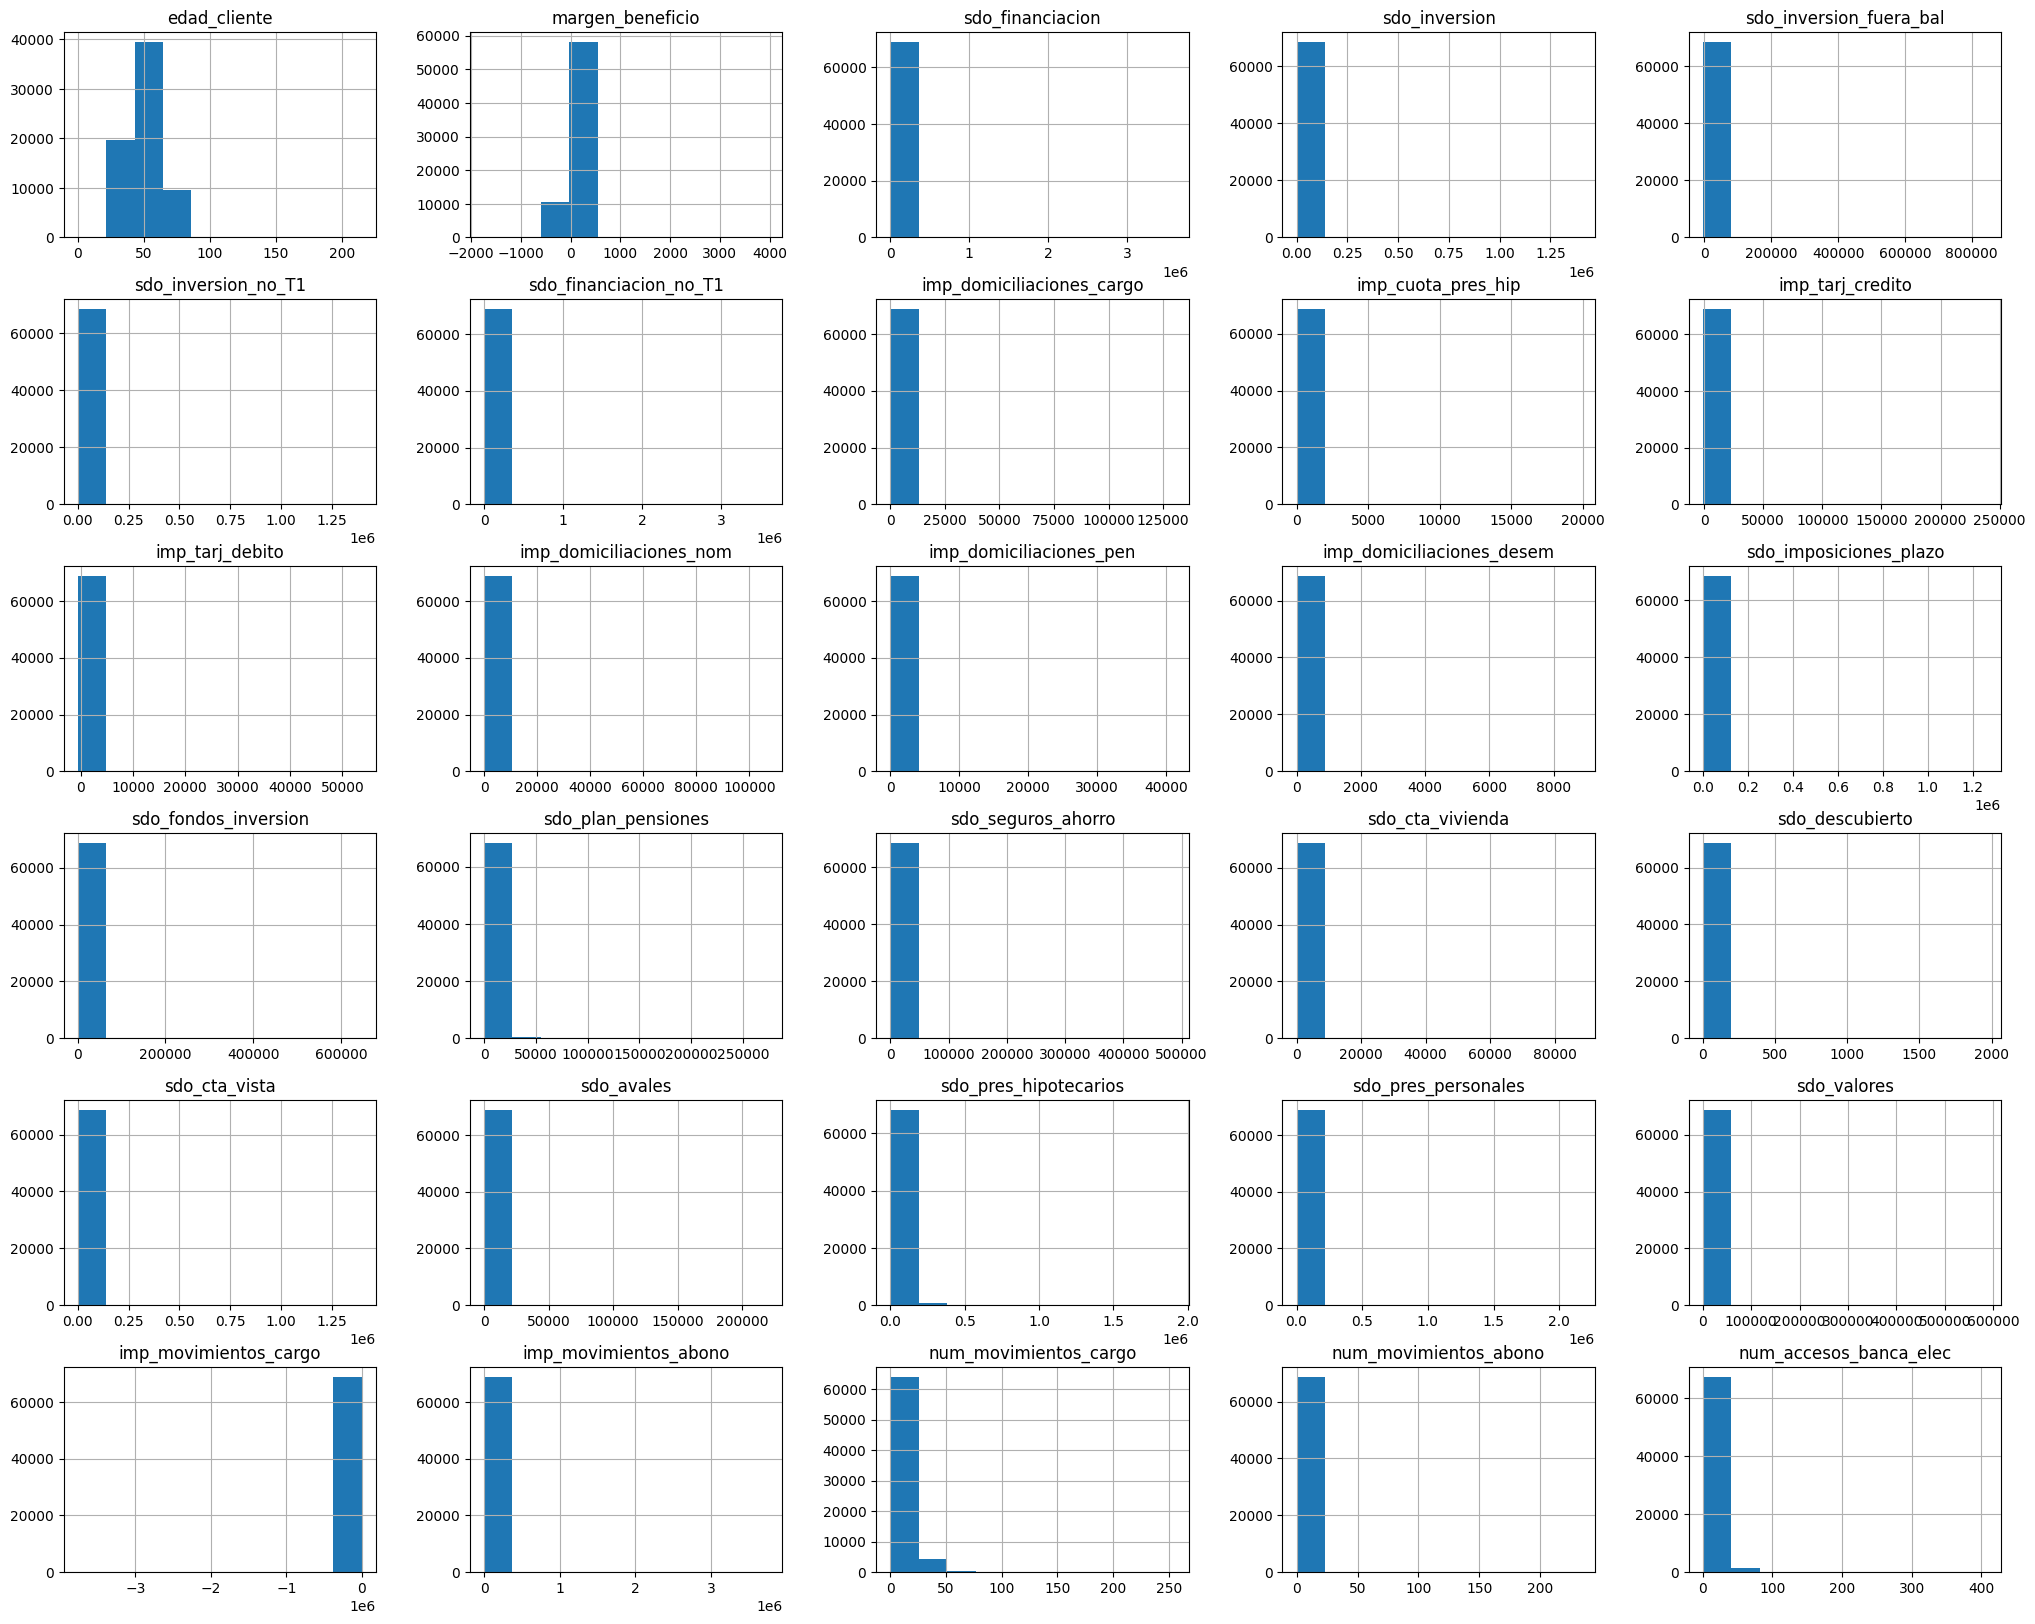

In [ ]:
#Visualizacion
df_numeric = train_data.select_dtypes(include=['int64', 'float64'])
df_numeric.hist(figsize=(25, 20))
plt.show()

##Preparacion de datos

In [ ]:
#Eliminar nulos
train_data.dropna(inplace=True)

In [ ]:
#Cambiar la columna 'cod_cliente' como valores numericos
encoder = LabelEncoder()

#Convertir todos los valores de 'cod_cliente' a cadenas
train_data['cod_cliente'] = train_data['cod_cliente'].astype(str)
application_data['cod_cliente'] = application_data['cod_cliente'].astype(str)

#Concatenar los datos de train y test paraque todas las etiquetas sean codificadas de la misma forma
all_data = pd.concat([train_data['cod_cliente'], application_data['cod_cliente']], axis=0)

#Aplicar el LabelEncoder a 'cod_cliente' de ambos conjuntos
all_data_encoded = encoder.fit_transform(all_data)

#Separar nuevamente los conjuntos
train_data['cod_cliente'] = all_data_encoded[:len(train_data)]
application_data['cod_cliente'] = all_data_encoded[len(train_data):]

In [ ]:
#Convertir 'N' y 'S' de Flag a valores numericos
train_data['flag'] = train_data['flag'].map({'N': 0, 'S': 1})

In [ ]:
#Verificar que la conversion
print(train_data['flag'].unique())

[0 1]


In [ ]:
#Dividir los datos X y Y
X = train_data.drop(columns=['flag'])
y = train_data['flag']

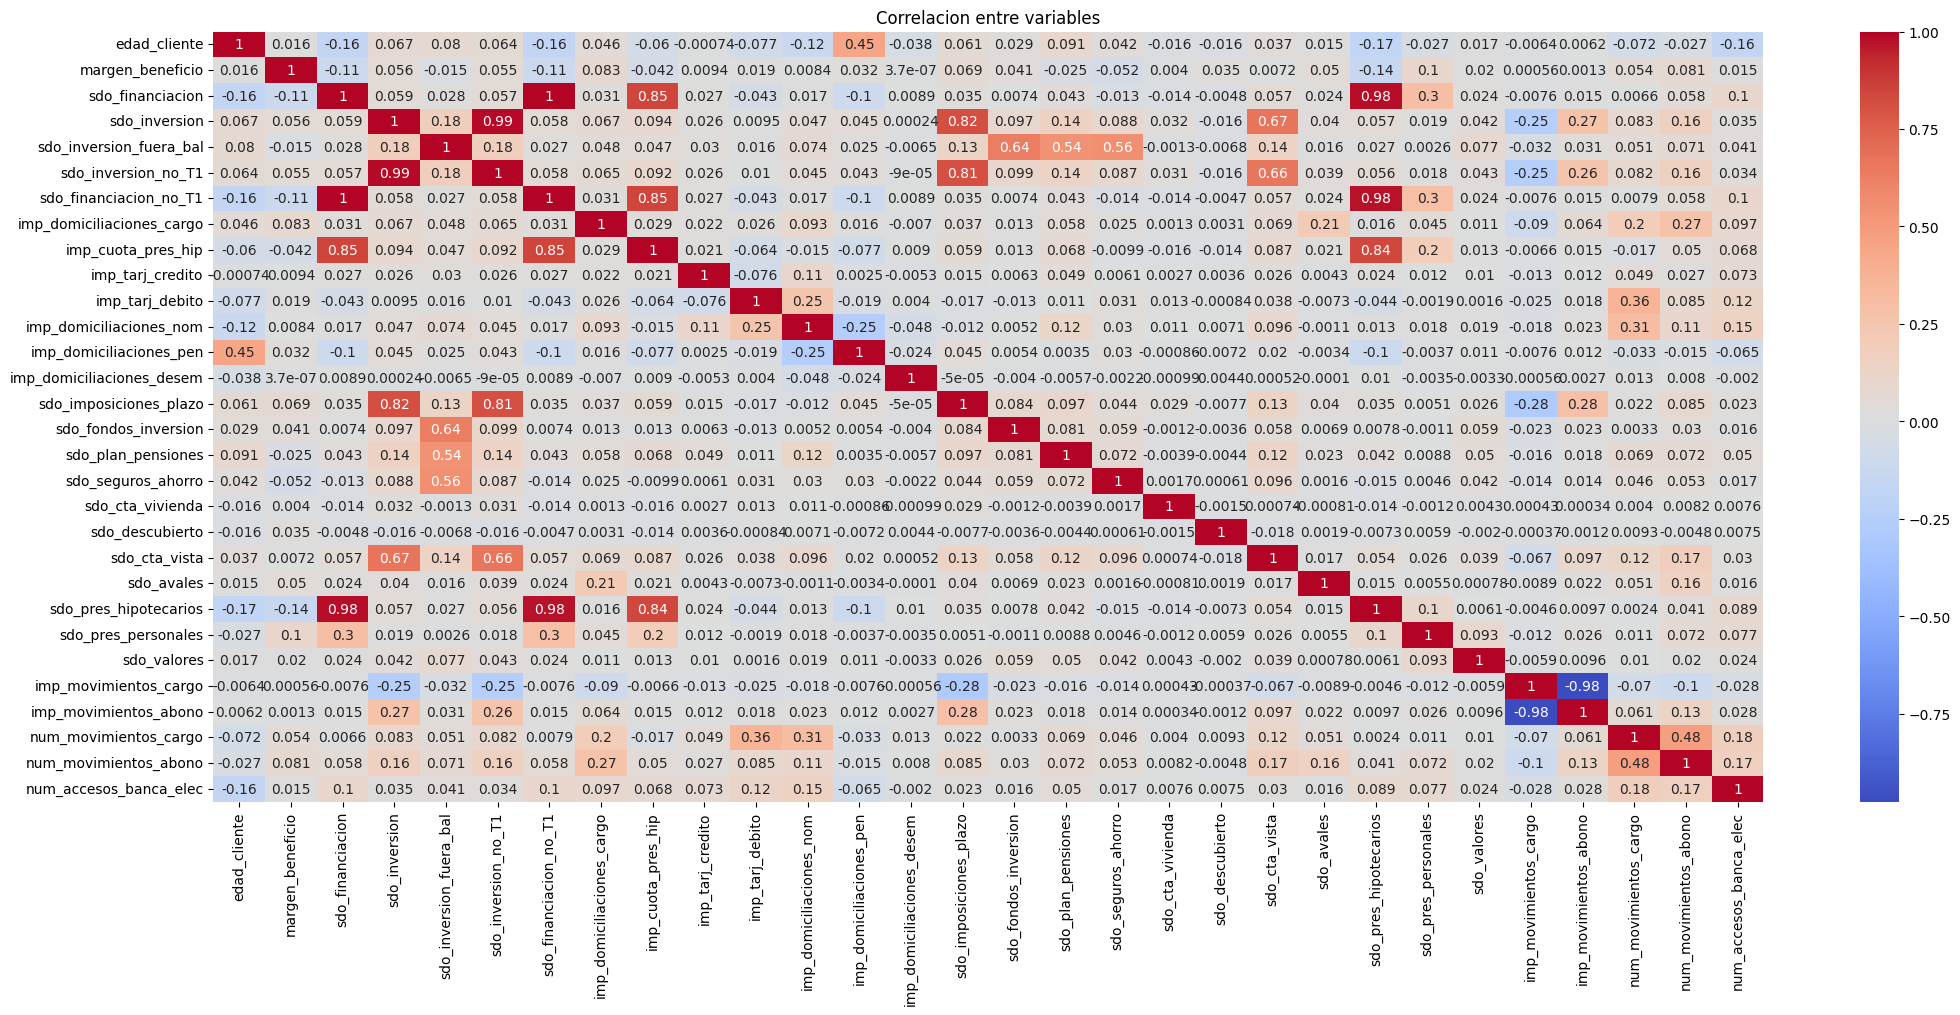

In [ ]:
#Visualizacion de la correlacion entre variables
plt.figure(figsize=(25, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlacion entre variables")
plt.show()

In [ ]:
#Dividir el conjunto en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Escalado de datos

In [ ]:
#Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Modelado de datos

In [ ]:
#Modelado
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##Evaluacion del modelo

In [ ]:
#Evaluacion del modelo
test_accuracy = accuracy_score(y_test, y_pred)
print("Precision:", test_accuracy)
print("Informe de clasificacion:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Precision: 0.9917265403875463
Informe de clasificacion:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13666
           1       0.40      0.02      0.03       113

    accuracy                           0.99     13779
   macro avg       0.70      0.51      0.51     13779
weighted avg       0.99      0.99      0.99     13779

ROC-AUC Score: 0.5087397960703457


In [ ]:
#Resultados
print("""
El modelo tiene una precision general del 99%, lo que significa que predice correctamente el 99% de los casos.
Sin embargo, la precision para la clase 0 (clientes no interesados en el credito) es muy alta (99%),
mientras que la precision para la clase 1 (clientes interesados en el credito) es baja (40%).
El recall para la clase 0 es excelente (100%), pero el recall para la clase 1 es extremadamente bajo (2%),
lo que indica que el modelo tiene dificultades para identificar correctamente a los clientes interesados en el credito.
""")


El modelo tiene una precision general del 99%, lo que significa que predice correctamente el 99% de los casos. 
Sin embargo, la precision para la clase 0 (clientes no interesados en el credito) es muy alta (99%), 
mientras que la precision para la clase 1 (clientes interesados en el credito) es baja (40%). 
El recall para la clase 0 es excelente (100%), pero el recall para la clase 1 es extremadamente bajo (2%), 
lo que indica que el modelo tiene dificultades para identificar correctamente a los clientes interesados en el credito.



##Aplicacion de nuevos datos

In [ ]:
#Aplicacion
application_data = pd.get_dummies(application_data)
application_data = application_data.reindex(columns=X.columns, fill_value=0)
application_scaled = scaler.transform(application_data)
application_pred = model.predict(application_scaled)
application_data['prediction'] = application_pred

In [ ]:
#Guardar resultados en un archivo CSV
application_data.to_csv("clientes_susceptibles_reto.csv", index=False)
print("Revisar carpeta de drive con los resultados")

Revisar carpeta de drive con los resultados


In [ ]:
#Clientes susceptibles
clientes_susceptibles = application_data[application_data['prediction'] == 1]
print("\nClientes susceptibles a contratar credito:")
print(clientes_susceptibles[['cod_cliente', 'prediction']])


Clientes susceptibles a contratar credito:
      cod_cliente  prediction
101           403           1
1307         3784           1
1365         4301           1
2251        13383           1
3829        30548           1
4747        41026           1
4847        42214           1
5506        49787           1
7152        68287           1
